In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from dython import nominal
from sklearn.preprocessing import LabelEncoder

# Dataset description

In [2]:
columns = ['edible',
           'cap-shape',
           'cap-surface',
           'cap-color',
           'bruises',
           'odor',
           'gill-attachment',
           'gill-spacing',
           'gill-size',
           'gill-color',
           'stalk-shape',
           'stalk-root',
           'stalk-surface-above-ring',
           'stalk-surface-below-ring',
           'stalk-color-above-ring',
           'stalk-color-below-ring',
           'veil-type',
           'veil-color',
           'ring-number',
           'ring-type',
           'spore-print-color',
           'population',
           'habitat'
          ]

1. **cap-shape**:
    - values : bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
2. **cap-surface**:
    - values: fibrous=f, grooves=g, scaly=y, smooth=s
3. **cap-color**:
    - values: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
4. **bruises**:
    - values: bruises=t, no=f
5. **odor**:                     
    - values: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
6. **gill-attachment**:
    - values: attached=a, descending=d, free=f, notched=n
7. **gill-spacing**:             
   - values: close=c, crowded=w, distant=d
8. **gill-size**:                
    - values: broad=b, narrow=n
9. **gill-color**:
    - values: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
10. **stalk-shape**:
    - values: enlarging=e, tapering=t,
11. **stalk-root**:
    - values: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
12. **stalk-surface-above-ring**: 
    - values: fibrous=f, scaly=y, silky=k, smooth=s
13. **stalk-surface-below-ring**: 
    - values: fibrous=f, scaly=y, silky=k, smooth=s
14. **stalk-color-above-ring**: 
    - values: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
15. **stalk-color-below-ring**: 
    - values: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
16. **veil-type**: 
    - values: partial=p, universal=u
17. **veil-color**: 
    - values: brown=n, orange=o, white=w, yellow=y
18. **ring-number**: 
    - values: none=n ,one=o, two=t
19. **ring-type**: 
    - values: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
20. **spore-print-color**: 
    - values: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
21. **population**: 
    - values: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
22. **habitat**: 
    - values: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

## Dataset preprocessing and analysis

 Load the data

In [3]:
data_dir = './data/'

In [4]:
data_input = 'agaricus-lepiota.data'

In [5]:
data_output = 'classification_data.csv'

In [6]:
data = pd.read_csv(data_dir+data_input, header=None)

Define the column names

In [7]:
data.columns = columns

---------

In [8]:
def replace_abbreviations(data, dict_abbreviations):
    data = data.replace(dict_abbreviations)
    return data

In [9]:
data["edible"] = replace_abbreviations(data["edible"], {'p': 'poisonous', 
                                                        'e': 'edible'
                                                       }
                                      )

In [10]:
data['cap-shape'] = replace_abbreviations(data['cap-shape'], {'b': 'bell', 
                                                              'c': 'conical', 
                                                              'x': 'convex', 
                                                              'f': 'flat', 
                                                              'k': 'knobbed', 
                                                              's': 'sunken'
                                                             }
                                         )

In [11]:
data['cap-surface'] = replace_abbreviations(data['cap-surface'], {'f': 'fibrous', 
                                                                  'g': 'grooves',
                                                                  'y': 'scaly', 
                                                                  's': 'smooth',
                                                                 }
                                           )

In [12]:
data['cap-color'] = replace_abbreviations(data['cap-color'], {'n': 'brown',
                                                              'b': 'buff',
                                                              'c': 'cinnamon', 
                                                              'g': 'gray',
                                                              'r': 'green',
                                                              'p': 'pink',
                                                              'u': 'purple',
                                                              'e': 'red',
                                                              'w': 'white',
                                                              'y': 'yellow',
                                                             }
                                         )

In [13]:
data['bruises'] = replace_abbreviations(data['bruises'], {'t': 'yes',
                                                          'f': 'no',
                                                         }
                                       )

In [14]:
data['odor'] = replace_abbreviations(data['odor'], {'a': 'almond',
                                                    'l': 'anise',
                                                    'c': 'creosote', 
                                                    'y': 'fishy', 
                                                    'f': 'foul', 
                                                    'm': 'musty',
                                                    'n': 'none',
                                                    'p': 'pungent',
                                                    's': 'spicy',
                                                   }
                                    )

In [15]:
data['gill-attachment'] = replace_abbreviations(data['gill-attachment'], {'a': 'attached',
                                                                          'd': 'descending',
                                                                          'f': 'free', 
                                                                          'n': 'notched'
                                                                         }
                                               )

In [16]:
data['gill-spacing'] = replace_abbreviations(data['gill-spacing'], {'c': 'close',
                                                                    'w': 'crowded', 
                                                                    'd': 'distant', 
                                                                   }
                                            )

In [17]:
data['gill-size'] = replace_abbreviations(data['gill-size'], {'b': 'broad',
                                                              'n': 'narrow', 
                                                             }
                                         )

In [18]:
data['gill-color'] = replace_abbreviations(data['gill-color'], {'k': 'black',
                                                                'n': 'brown',
                                                                'b': 'buff', 
                                                                'h': 'chocolate', 
                                                                'g': 'gray', 
                                                                'r': 'green',
                                                                'o': 'orange',
                                                                'p': 'pink',
                                                                'u': 'purple',
                                                                'e': 'red',
                                                                'w': 'white',
                                                                'y': 'yellow',
                                                               }
                                          )

In [19]:
data['stalk-shape'] = replace_abbreviations(data['stalk-shape'], {'e': 'enlarging',
                                                                  't': 'tapering', 
                                                                 }
                                           )

In [20]:
data['stalk-root'] = replace_abbreviations(data['stalk-root'], {'b': 'bulbous',
                                                                'c': 'club', 
                                                                'u': 'cup', 
                                                                'e': 'equal',
                                                                'z': 'rhizomorphs',
                                                                'r': 'rooted', 
                                                                '?': np.nan, 
                                                               }
                                          )

In [21]:
data['stalk-surface-above-ring'] = replace_abbreviations(data['stalk-surface-above-ring'], {'f': 'fibrous',
                                                                                            'y': 'scaly', 
                                                                                            'k': 'silky', 
                                                                                            's': 'smooth', 
                                                                                           }
                                                        )

In [22]:
data['stalk-surface-below-ring'] = replace_abbreviations(data['stalk-surface-below-ring'], {'f': 'fibrous',
                                                                                            'y': 'scaly', 
                                                                                            'k': 'silky', 
                                                                                            's': 'smooth', 
                                                                                           }
                                                        )

In [23]:
data['stalk-color-above-ring'] = replace_abbreviations(data['stalk-color-above-ring'], {'n': 'brown',
                                                                                        'b': 'buff',
                                                                                        'c': 'cinnamon', 
                                                                                        'g': 'gray', 
                                                                                        'o': 'orange',
                                                                                        'p': 'pink',
                                                                                        'e': 'red',
                                                                                        'w': 'white',
                                                                                        'y': 'yellow',
                                                                                       }
                                                      )

In [24]:
data['stalk-color-below-ring'] = replace_abbreviations(data['stalk-color-below-ring'], {'n': 'brown',
                                                                                        'b': 'buff', 
                                                                                        'c': 'cinnamon', 
                                                                                        'g': 'gray', 
                                                                                        'o': 'orange',
                                                                                        'p': 'pink',
                                                                                        'e': 'red',
                                                                                        'w': 'white',
                                                                                        'y': 'yellow',
                                                                                       }
                                                      )

In [25]:
data['veil-type'] = replace_abbreviations(data['veil-type'], {'p': 'partial',
                                                              'u': 'universal', 
                                                             }
                                         )

In [26]:
data['veil-color'] = replace_abbreviations(data['veil-color'], {'n': 'brown',
                                                                'o': 'orange', 
                                                                'w': 'white', 
                                                                'y': 'yellow', 
                                                               }
                                          )

In [27]:
data['ring-number'] = replace_abbreviations(data['ring-number'], {'n': 0,
                                                                  'o': 1, 
                                                                  't': 2, 
                                                                 }
                                           )

In [28]:
data['ring-type'] = replace_abbreviations(data['ring-type'], {'c': 'cobwebby',
                                                              'e': 'evanescent', 
                                                              'f': 'flaring', 
                                                              'l': 'large',  
                                                              'n': 'none', 
                                                              'p': 'pendant',
                                                              's': 'sheathing',
                                                              'z': 'zone', 
                                                             }
                                         )

In [29]:
data['spore-print-color'] = replace_abbreviations(data['spore-print-color'], {'k': 'black',
                                                                              'n': 'brown',
                                                                              'b': 'buff', 
                                                                              'h': 'chocolate', 
                                                                              'r': 'green',
                                                                              'o': 'orange',
                                                                              'u': 'purple',
                                                                              'w': 'white',
                                                                              'y': 'yellow',
                                                                             }
                                                 )

In [30]:
data['population'] = replace_abbreviations(data['population'], {'a': 'abundant',
                                                                'c': 'clustered', 
                                                                'n': 'numerous', 
                                                                's': 'scattered',
                                                                'v': 'several', 
                                                                'y': 'solitary',  
                                                               }
                                          )

In [31]:
data['habitat'] = replace_abbreviations(data['habitat'], {'g': 'grasses',
                                                          'l': 'leaves', 
                                                          'm': 'meadows', 
                                                          'p': 'paths',
                                                          'u': 'urban', 
                                                          'w': 'waste', 
                                                          'd': 'woods', 
                                                         }
                                       )

In [32]:
data

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,1,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,1,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,1,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,1,evanescent,white,several,leaves


Check for empty values

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edible                    8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

it seems that only 1 column has empty values - we will change this value to `unknown`

In [34]:
data['stalk-root'] = replace_abbreviations(data['stalk-root'], {np.nan: 'unknown' 
                                                               }
                                          )

In [35]:
data.isnull().any().sum()

0

Now there are no empty values.

-------------

Analyse the dataset in regards to the output features.

In [36]:
dep_var = 'edible'

### Functions

In [37]:
def plot_bar(data, split_col, title='Bar Plot', title_size=25, axes_size=15, tick_size=12):
    fig, ax = plt.subplots(figsize=(10, 5))
    labels = data[split_col].unique()
    bar_heights = data[split_col].value_counts()
    ax.bar(labels, bar_heights)
    plt.title(title, fontsize=title_size)
    plt.xlabel(dep_var.capitalize(), fontsize=axes_size)
    plt.ylabel("Frequency", fontsize=axes_size)
    ax.tick_params(axis='both', which='major', labelsize=tick_size)
    plt.show()

In [38]:
def plot_pie(data, split_col, title='Pie Plot', title_size=25):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    fig, ax = plt.subplots(figsize=(10, 5))
    labels = data[split_col].unique()
    sizes = data[split_col].value_counts()

    ax.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title, fontsize=title_size)

    plt.show()

In [39]:
def plot_distribution(data, split_column, title='Bar Plot', title_size=25, axes_size=15, tick_size=12):
    df = data[split_column].copy()
    # actual plotting
    x = df.unique()

    fig, ax = plt.subplots(figsize=(10, 5))
    
    sns.countplot(df, ax=ax)


    # setting titles
    fig.suptitle(title, fontsize=title_size,  y=1.02)
    plt.xlabel(split_column.capitalize(), fontsize=axes_size)
    ax.set_xlabel(split_column.capitalize(), fontsize=axes_size)
    ax.set_ylabel('Frequency', fontsize=axes_size)
    ax.tick_params(axis='x', which='major', labelsize=tick_size, labelrotation=90)
    ax.tick_params(axis='y', which='major', labelsize=tick_size)
    ax.tick_params(axis='x', which='major', labelsize=tick_size, labelrotation=90)
    ax.tick_params(axis='y', which='major', labelsize=tick_size)
    plt.show()

In [40]:
def plot_output_distribution(data, split_column, dep_var=dep_var, title='Bar Plot', title_size=25, axes_size=15, tick_size=12):
    df = data[[split_column, dep_var]].copy()
    df_grouped = df.groupby([split_column, dep_var]).agg(count=(dep_var, 'count')).unstack(1)
    columns = []
    for stacked_col_name in df_grouped.columns:
        columns.append(stacked_col_name[1])
    df_grouped.columns = columns
    if columns[0] == 'edible':
        colors = ['green', 'red']
    else:
        colors = ['red', 'green']
    # actual plotting
    x = df_grouped.index
    # fill Nan columns as we are stacking columns
    y1 = df_grouped[columns[0]].fillna(0)
    y2 = df_grouped[columns[1]].fillna(0)
    total = y1 + y2
    y1_percentage = y1/total
    y2_percentage = y2/total
    
    fig, ax = plt.subplots(1,2, figsize=(10, 5))

    ax[0].bar(x, y1_percentage, color=colors[0])
    ax[0].bar(x, y2_percentage, bottom=y1_percentage, color=colors[1])
    df_grouped.plot(kind="bar", stacked=False, color=colors, ax=ax[1])
    
    # setting titles
    fig.suptitle(title, fontsize=title_size,  y=1.02)
    ax[0].set_title("Frequency (%)", fontsize=axes_size)
    ax[1].set_title("Frequency (amount)", fontsize=axes_size)
    
    ax[0].set_xlabel(split_column.capitalize(), fontsize=axes_size)
    ax[1].set_xlabel(split_column.capitalize(), fontsize=axes_size)
    ax[0].tick_params(axis='x', which='major', labelsize=tick_size, labelrotation=90)
    ax[0].tick_params(axis='y', which='major', labelsize=tick_size)
    ax[1].tick_params(axis='x', which='major', labelsize=tick_size, labelrotation=90)
    ax[1].tick_params(axis='y', which='major', labelsize=tick_size)
    plt.show()

In [41]:
# Idea taken from https://www.kaggle.com/ragnar123/very-fst-model
def reduce_mem_usage(data, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = data.memory_usage().sum() / 1024**2    
    for col in data.columns:
        col_type = data[col].dtypes
        if col_type in numerics:
            print('Reducing for {}'.format(col))
            c_min = data[col].min()
            c_max = data[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    data[col] = data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    data[col] = data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    data[col] = data[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    data[col] = data[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    data[col] = data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    data[col] = data[col].astype(np.float32)
                else:
                    data[col] = data[col].astype(np.float64)
        else:
            data[col] = data[col].astype('category')
    end_mem = data.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return data


In [42]:
# Idea taken from https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

### Implementation

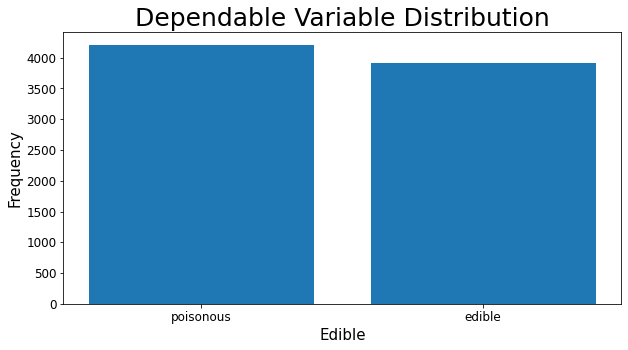

In [43]:
plot_bar(data, dep_var, title='Dependable Variable Distribution')

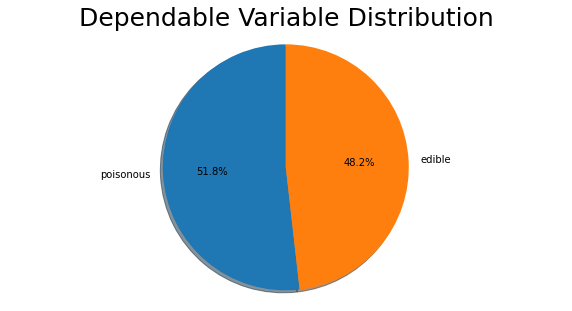

In [44]:
plot_pie(data, dep_var, title='Dependable Variable Distribution')

It seems that the data, in regards to the output variable, is distributed almost equally, which is perfect.

As our dataset is composed of mainly categorical variables, a correlation matrix could not be applied. The way that we are going to measure the associativity between the variables is by utilising  Cramer's V [1]. It is based on the Chi-Squared [2] and generally, the values vary from 0 to 1 (0 being the least associativity and 1 being the most associativity) and there are no negative values. Moreover, it is a commutative feature, therefore it is not sensitive to variables swapping places.<br>
However, the symmetrical characteristic of Cramer's V may result in not using valuable information in the model. For example, given two features are highly correlated, the first one may be a good predictor for the second one, while the opposite may not be true. As a result, Theil's U [3] asymmetry comes in useful. It measures the conditional entropy between x and y - what are the possible values of y, given x and probabilities of each happening. The values that Theil's U can take are the same as the possible values for Cramer's V. However, as made clear before, it is not symmetric.

[1] Akoglu, H., 2018. User's guide to correlation coefficients. Turkish journal of emergency medicine, 18(3), pp.91-93.<br>
[2] Lancaster, H.O. and Seneta, E., 2005. Chi‐square distribution. Encyclopedia of biostatistics, 2.<br>
[3] Bliemel, F., 1973. Theil's forecast accuracy coefficient: A clarification.

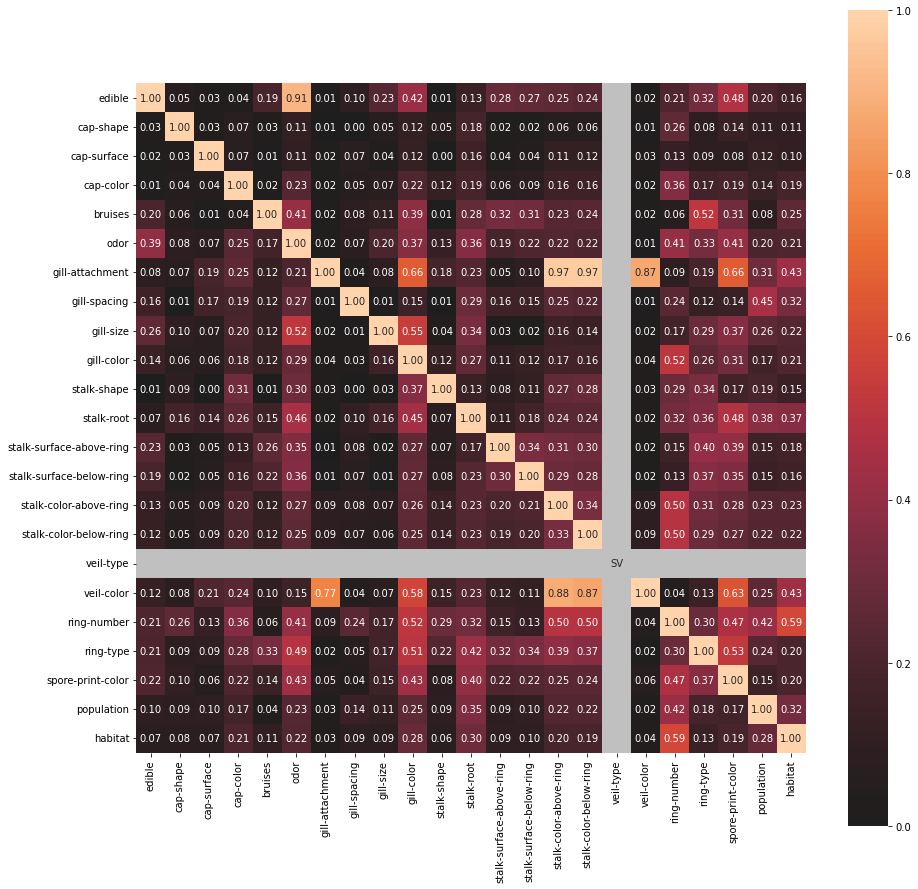

In [45]:
correlations = nominal.associations(data, nom_nom_assoc='theil', figsize=(15, 15))

Now that we have obtained the correlation matrix for this dataset, we can drop the features that are easily predictable given the value of another feature. Both stalk colors above and below the ring can be almost 100% predicted given the gill-attachment column, therefore we can drop those columns as they will only slow down the process of training a good model. Also, the veil-type column has only 1 value, that being the case, it can also be dropped from the dataset.

In [46]:
data = data.drop(['veil-type', 'stalk-color-above-ring', 'stalk-color-below-ring'], axis=1)

New data is composed of 20 columns, 1 of which is the output column.

------

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


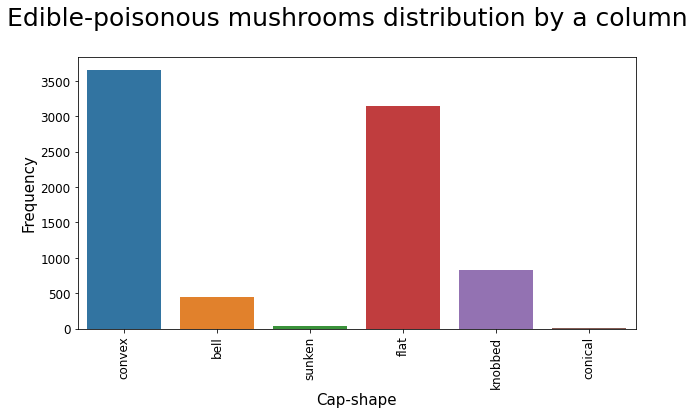

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


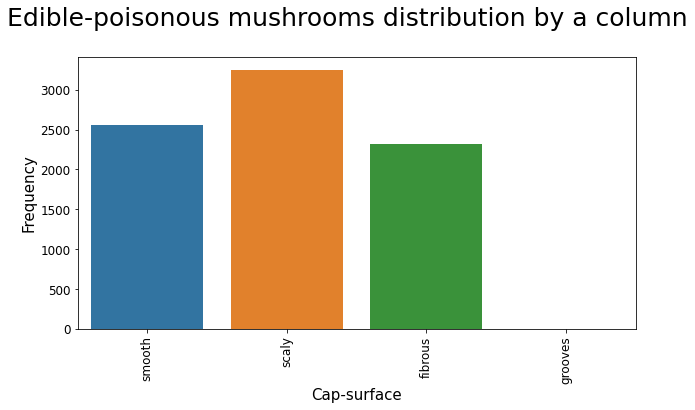

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


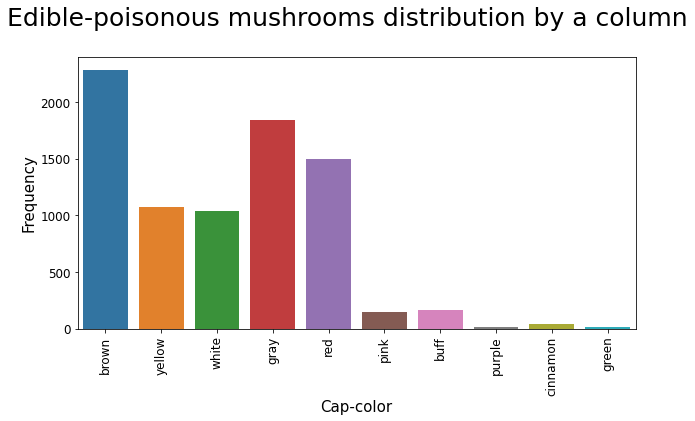

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


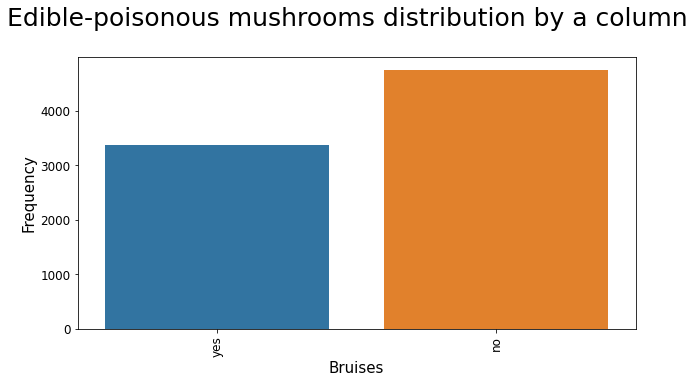

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


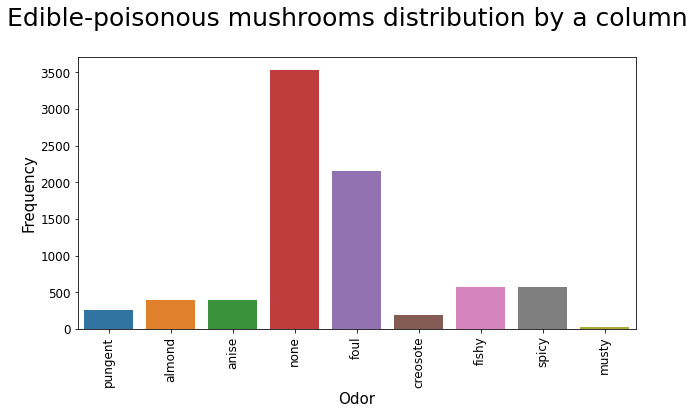

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


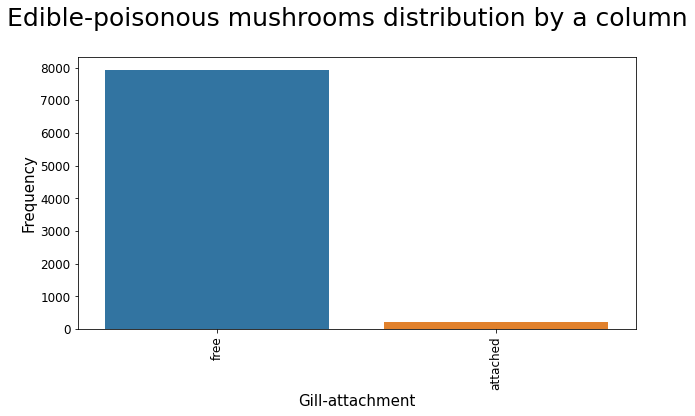

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


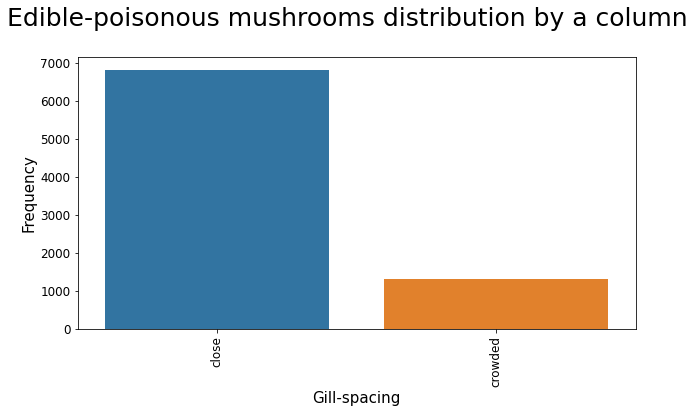

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


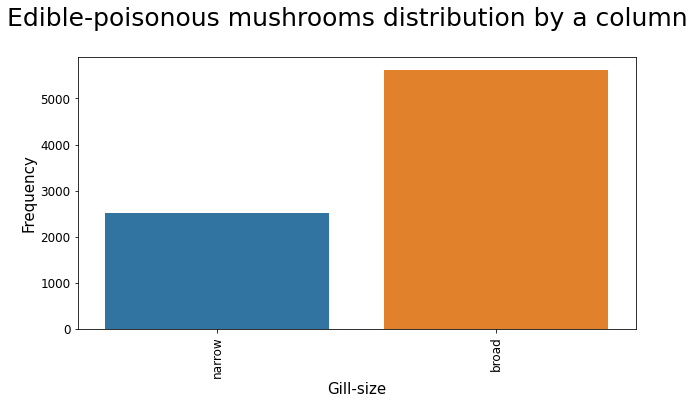

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


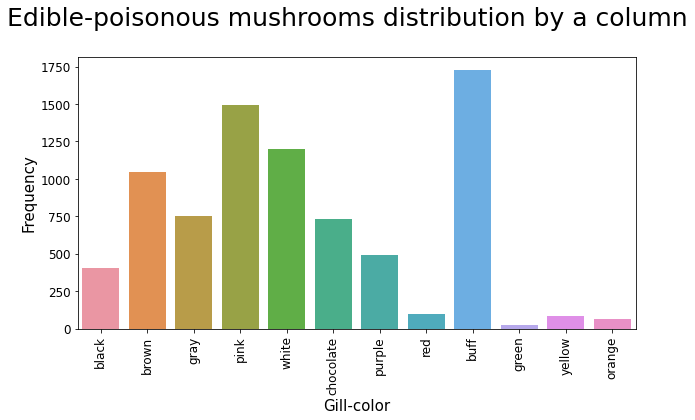

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


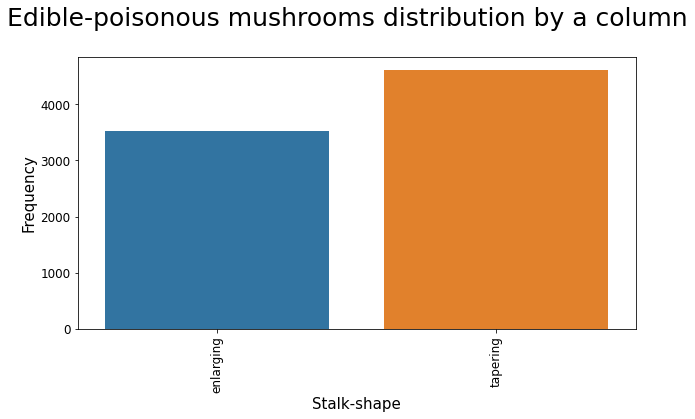

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


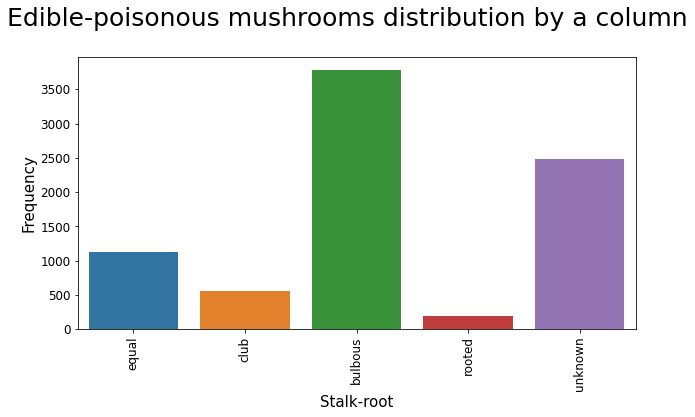

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


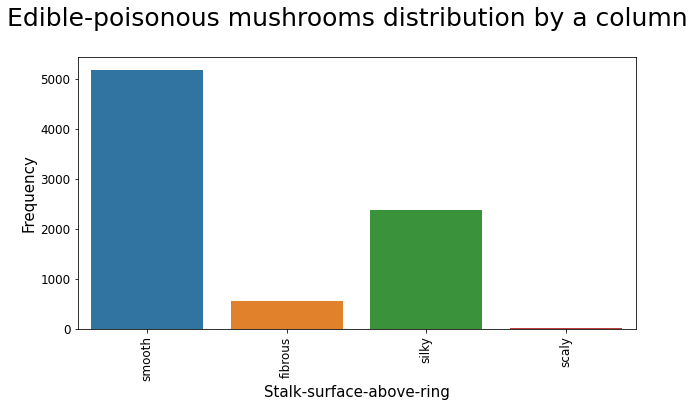

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


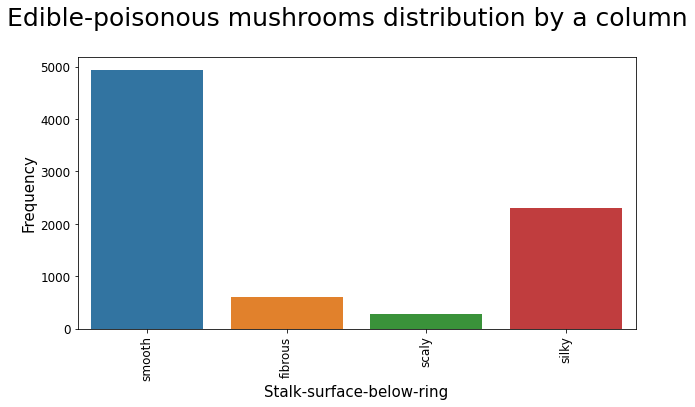

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


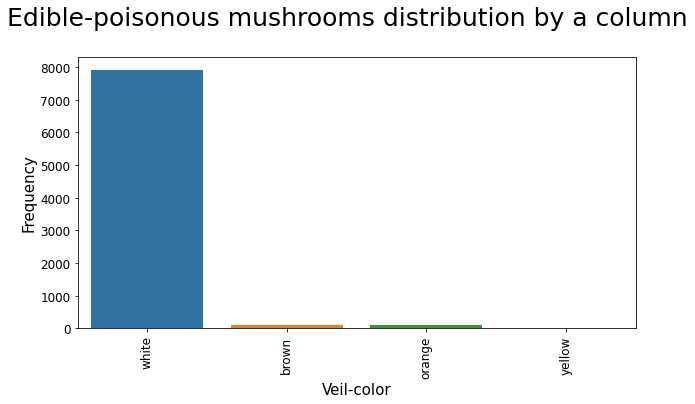

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


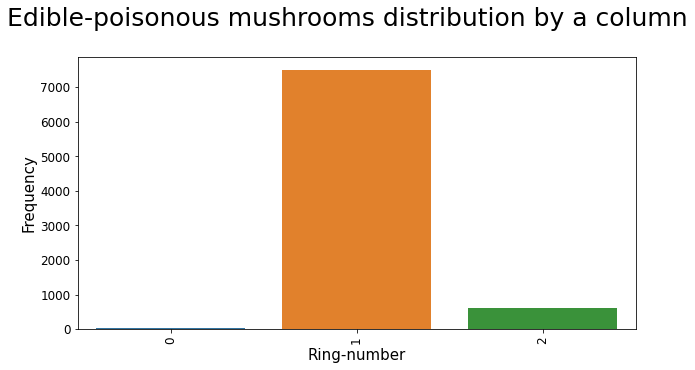

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


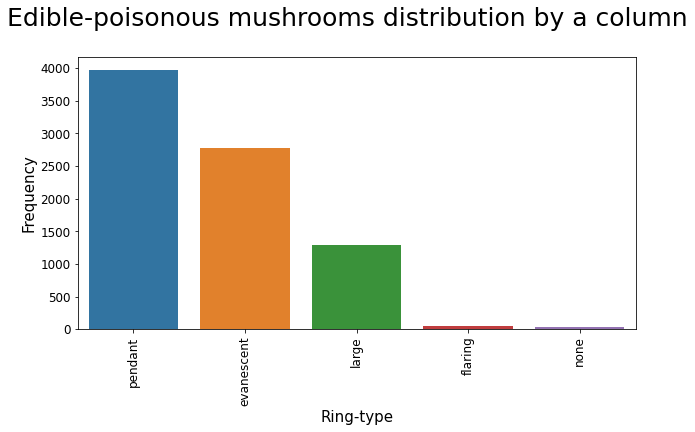

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


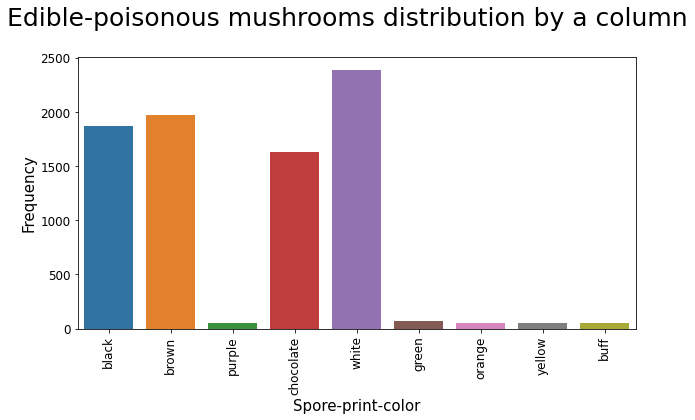

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


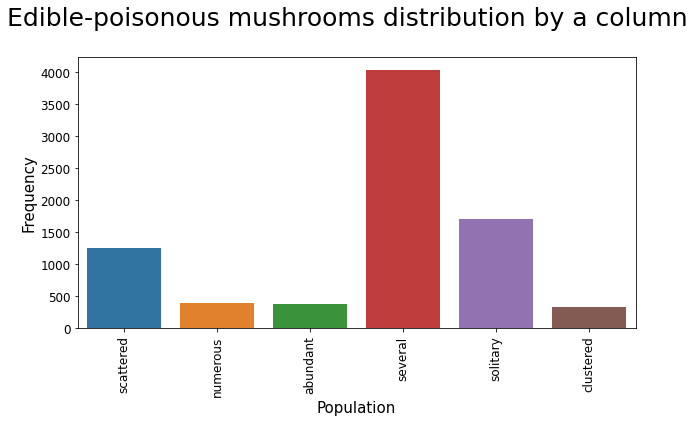

d:\uni\masters\diss\diss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


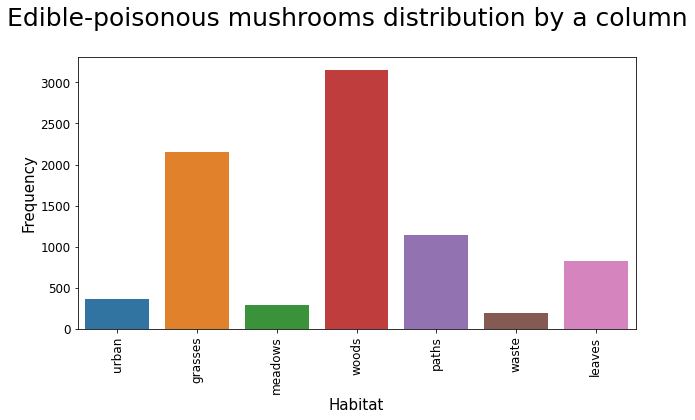

In [47]:
for column in data.columns:
    if column != dep_var:
        plot_distribution(data, column, title='Edible-poisonous mushrooms distribution by a column')

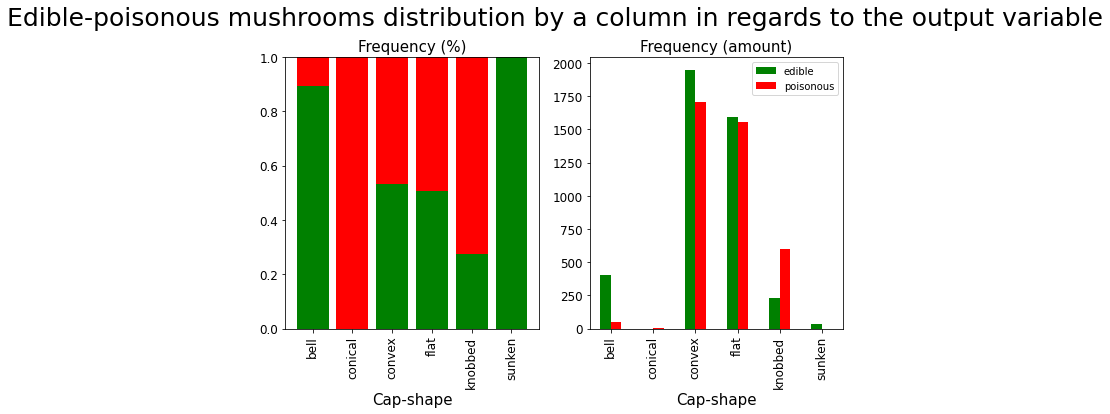

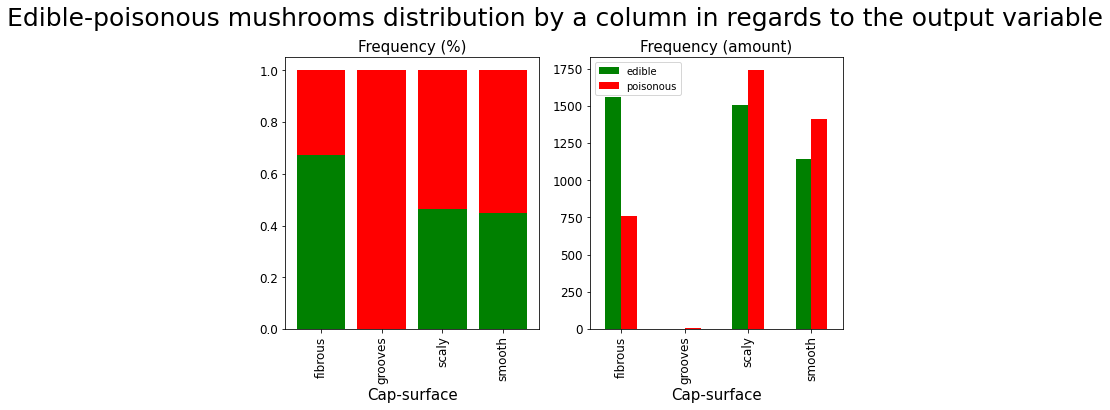

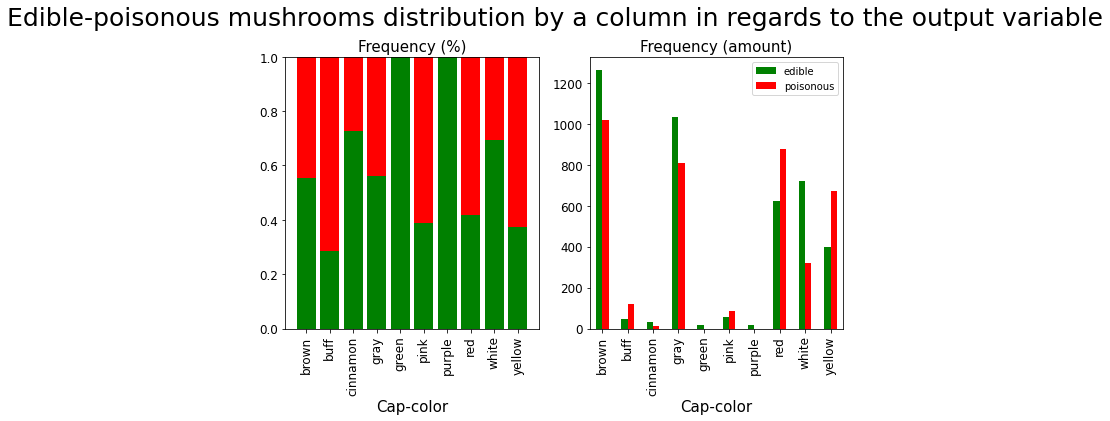

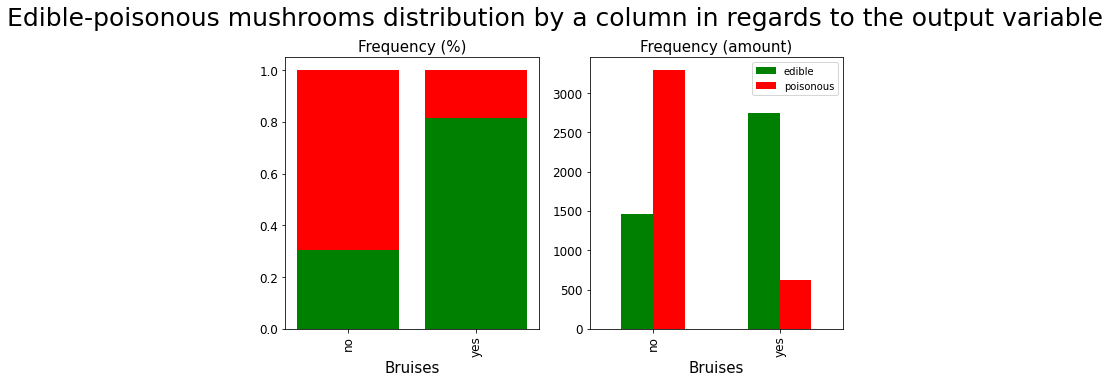

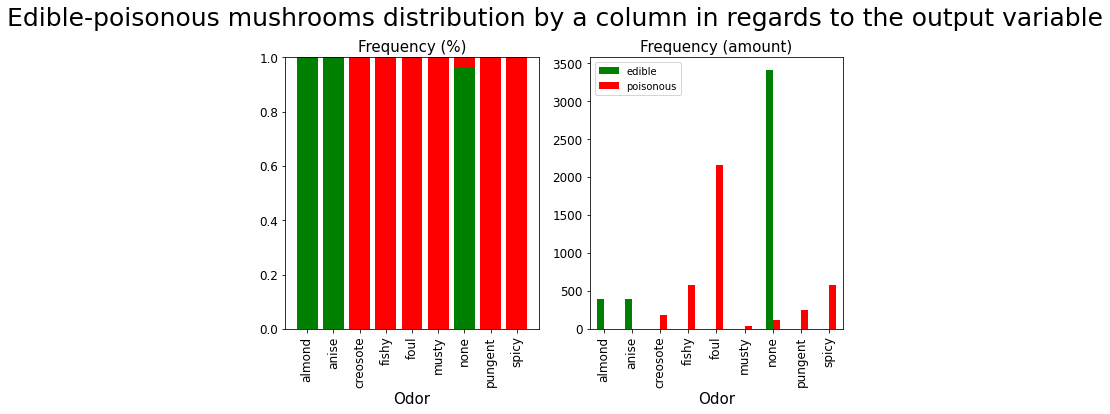

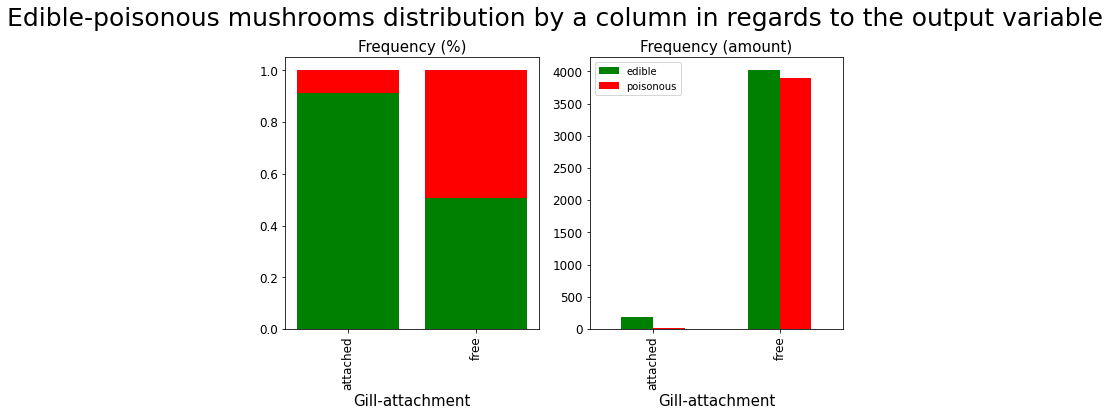

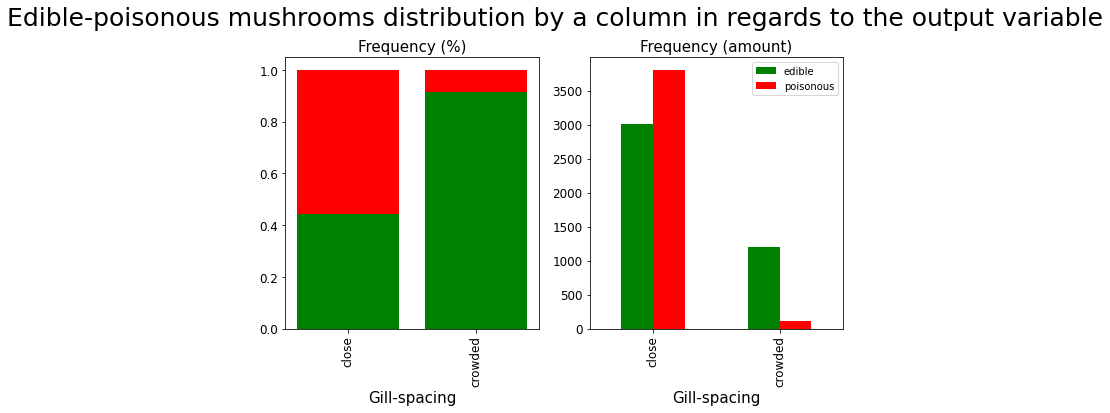

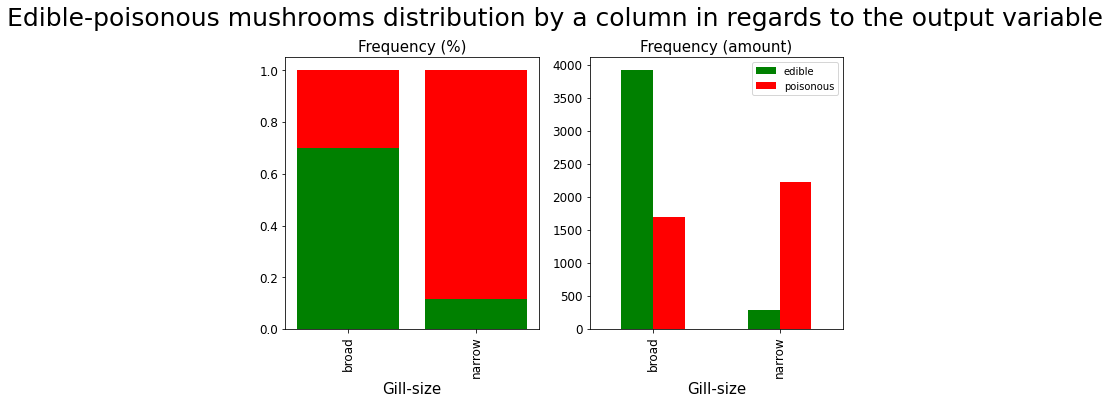

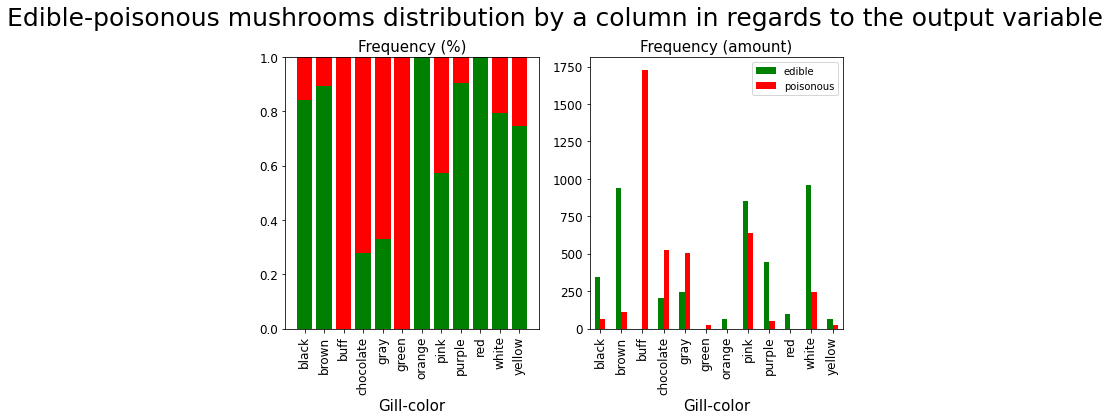

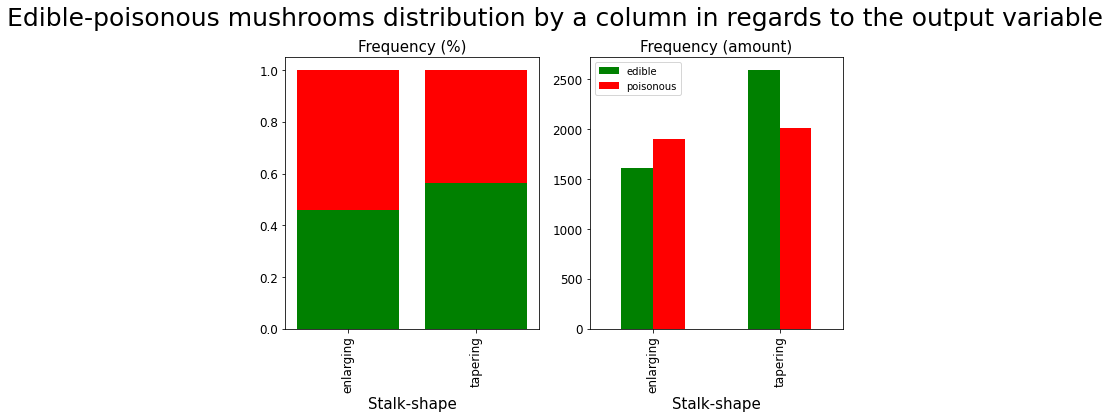

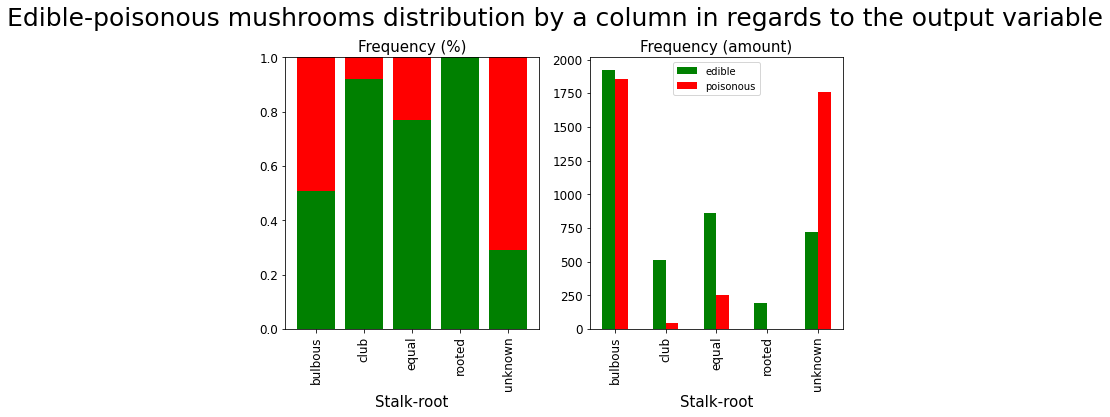

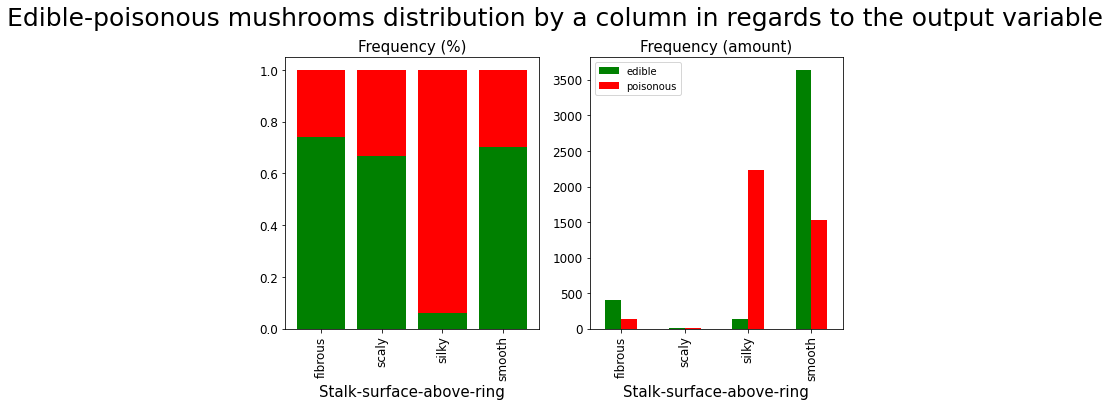

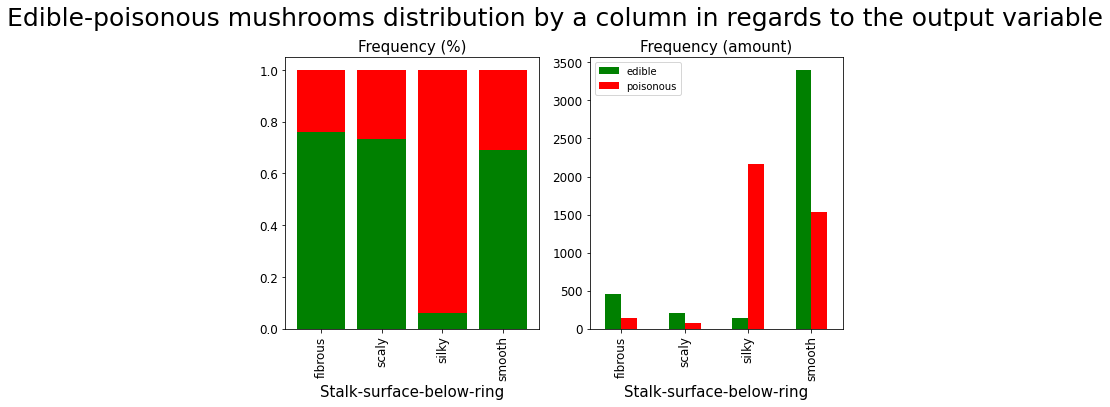

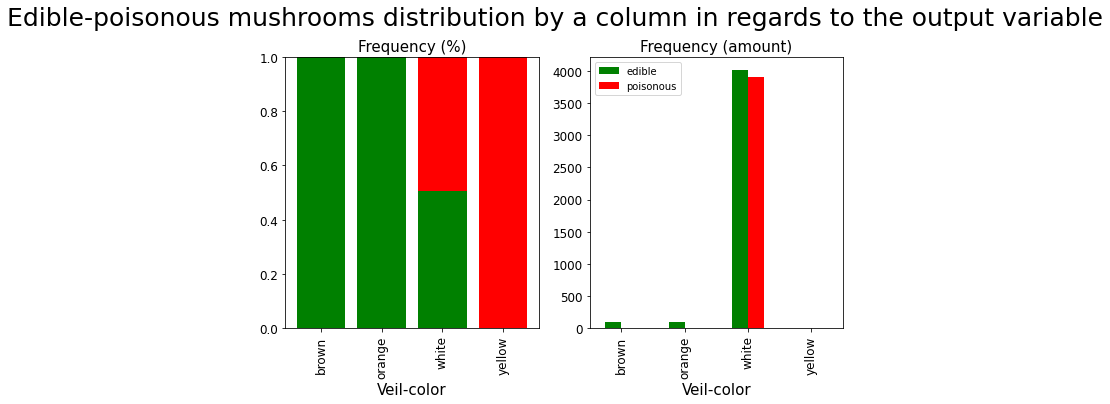

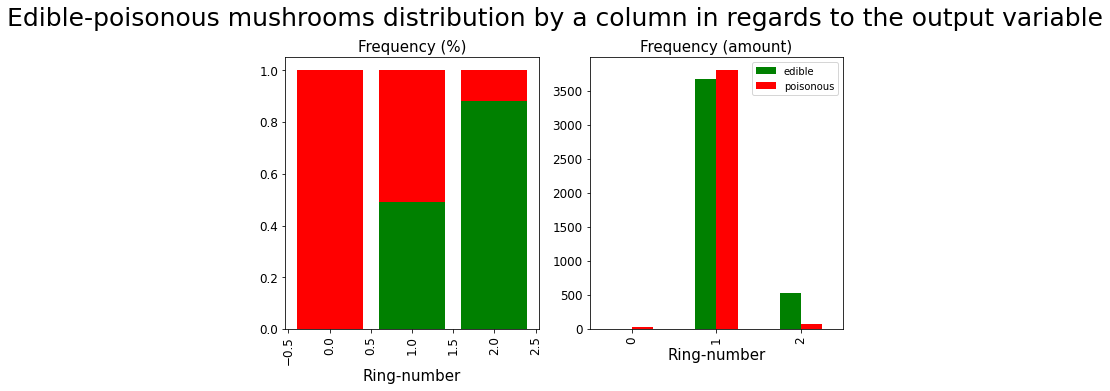

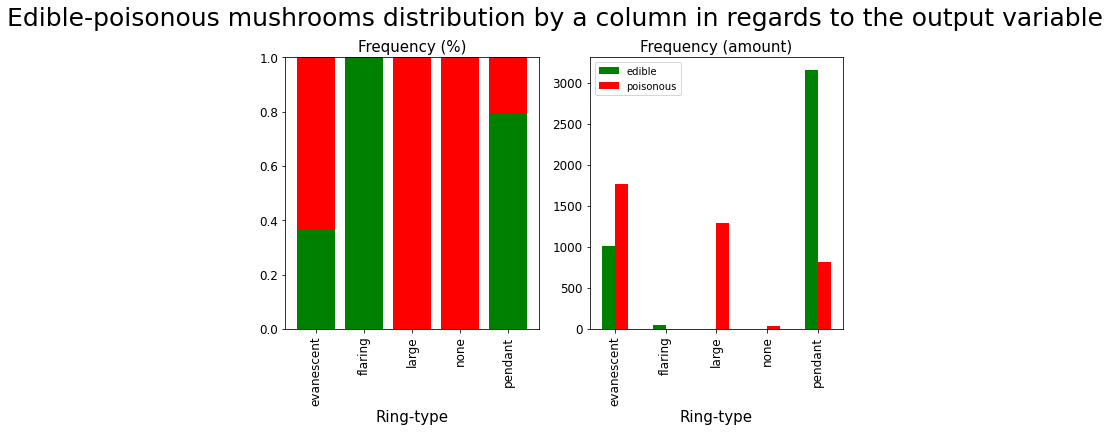

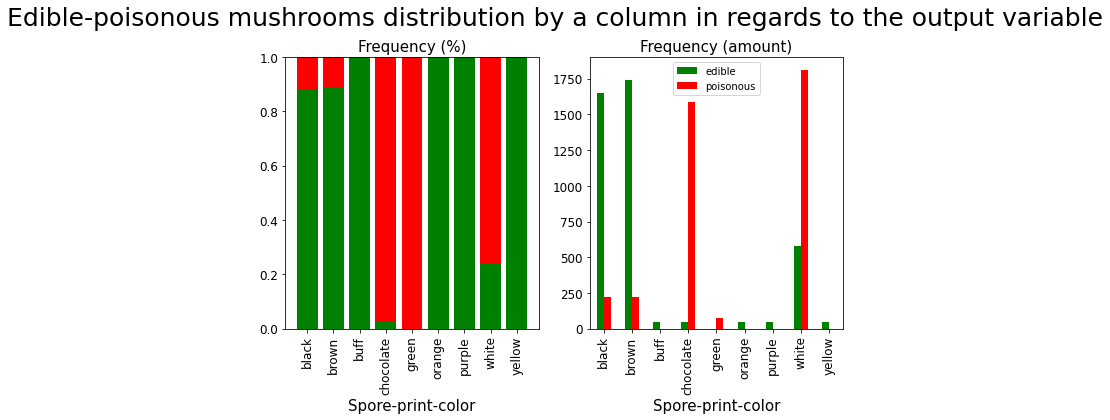

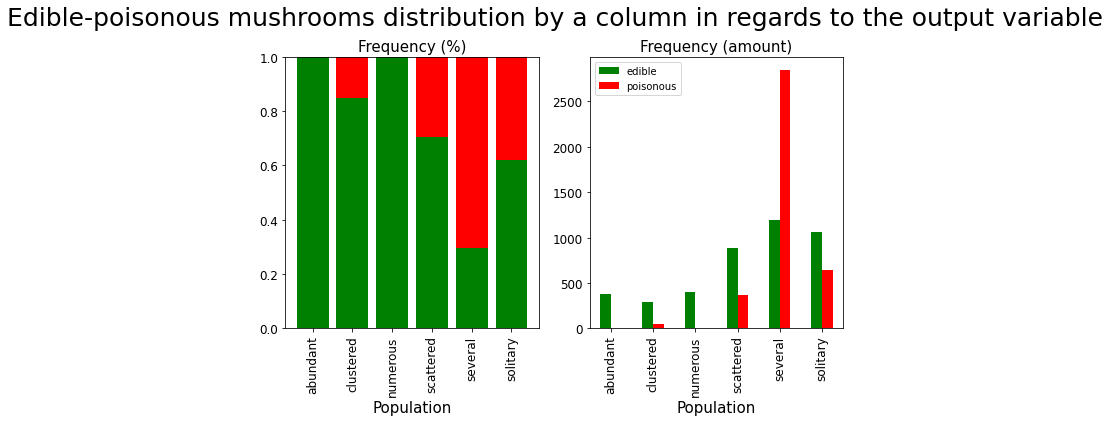

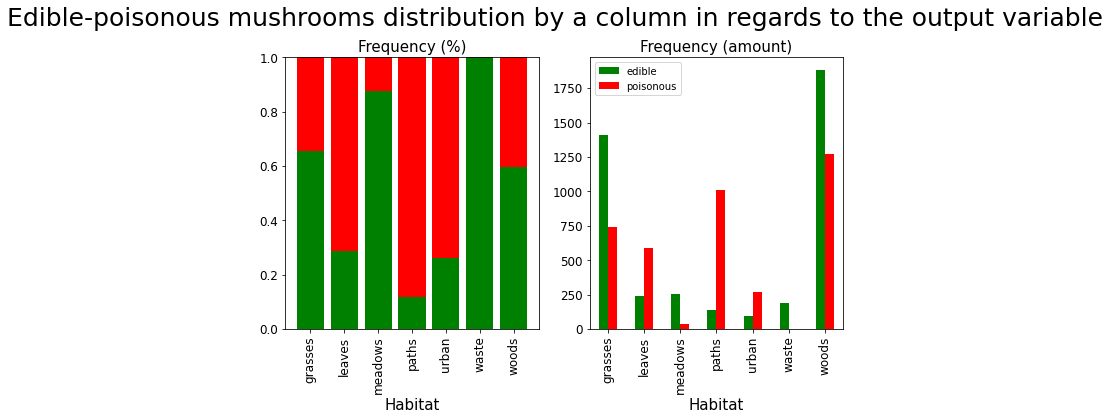

In [51]:
for column in data.columns:
    if column != dep_var:
        plot_output_distribution(data, column, title='Edible-poisonous mushrooms distribution by a column in regards to the output variable')

-----------------------------------------------------------------------

Reduce the data size to avoid overflow

In [49]:
data = reduce_mem_usage(data)

Reducing for ring-number
Mem. usage decreased to  0.16 Mb (87.2% reduction)


In [ ]:
data.info()

Save the dataset

In [50]:
data.to_csv(data_dir+data_output)